100%|██████████| 50000/50000 [02:53<00:00, 288.44it/s]


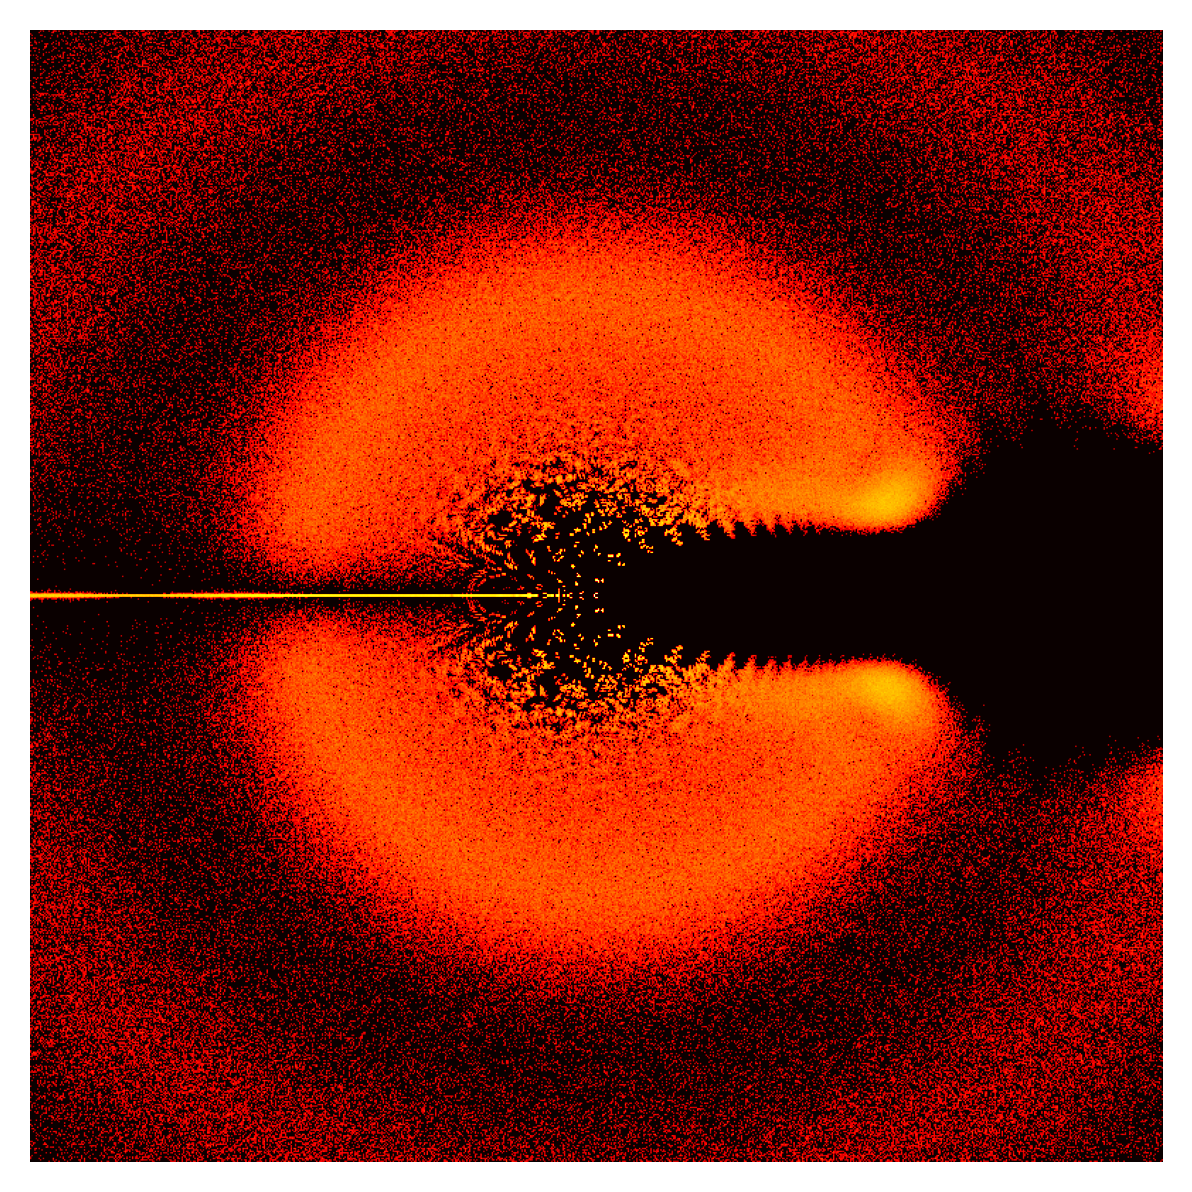

In [54]:
import numpy as np
import math

params = {
    'n_poly': 50_000,
    'n_matrix': 800,
    'degree': 61,
    'sc': 0.4,
    'tr_x': 0,
    'tr_y': 0,
    'coef': (1, -1),
}

def m_show(m, size = 5, cmap = 'hot'):
    import matplotlib.pyplot as plt
    from numpy import array
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(array(m), cmap = cmap) #, interpolation='bicubic' )
    plt.show()
    plt.close()


def log_density_map(val, max_count):
    max_count +=1
    brightness = math.log(val) / math.log(max_count+1)
    gamma = 2.2
    brightness = math.pow(brightness, 1/gamma)
    return 256*brightness


def prep_m(m):
    max_v = np.max(m)
    shape = m.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            if m[i][j] > 0:
                m[i][j] = log_density_map(m[i][j], max_v)
    return m


def sample_func(n):
    from random import uniform
    from math import pi, sin, cos
    return [sin(uniform(0, pi*0.01))*1j + cos(uniform(0, pi*0.01)) for i in range(n)] 


def sample_func_2(n):
    from random import uniform
    from math import pi, sin, cos
    from random import choice
    return [((n/2-abs(i-n/2+1))**8)*choice((1,1j)) for i in range(n)]

def form_poly_matrix(params):
    from random import choices
    from math import floor 
    from tqdm import tqdm 

    N = params['n_poly']
    M_size = params['n_matrix']
    sc = params['sc']
    D = params['degree']
    population = params['coef']
    dx = params['tr_x']
    dy = params['tr_y']

    base_mat = np.zeros((M_size, M_size), dtype=int)

    for i in tqdm(range(N)):
        #poly = choices(population, k = D)
        #poly = sample_func(D)
        poly = sample_func_2(D)

        #poly[0] = poly[0]
        roots = np.roots(poly)

        for r in roots:
            if abs(r.imag) > 0.000001:

                x = floor((r.real +dx)*M_size*sc + M_size/2)
                y = floor((r.imag +dy)*M_size*sc + M_size/2)

                if 0 <= x < M_size and 0 <= y < M_size:
                    base_mat[y][x] += 1

    return base_mat

m = form_poly_matrix(params)
m = prep_m(m)
m_show(m)

In [48]:
n = 31
print([n/2 - abs(i-n/2+1) for i in range(n)])

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]
